# Парсер с Риа новости https://ria.ru/search/

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://newssearch.yandex.ru/yandsearch?rpt=nnews2&rel=rel&within=9'
HEADER = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                         'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36', 
          'accept': '*/*'}
r = requests.get(url, headers = HEADER)
soup = BeautifulSoup(r.content.decode('utf-8','ignore'), 'html.parser')
news = []
for link in soup.find_all('li', class_ =  'search-item'):
    news+=[link.text]
news

for i in tqdm(range(100)):
    r = requests.get(url, headers = HEADER)
    soup = BeautifulSoup(r.content.decode('utf-8','ignore'), 'html.parser')
    if len(soup.find_all('li', class_ =  'search-item')):
        print(123)    
soup

In [2]:
url = 'https://ria.ru/search/'
# url = 'https://ria.ru/services/search/getmore/?query=&amp;offset=20&amp;interval=week'

HEADERS = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                         'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36', 
          'accept': '*/*'}

# /services/search/getmore/?query=&offset=20&interval=period&date_from=2020-12-18&date_to=2020-12-25

PARAMS = {'interval': "period",
          'date_from':'2020-12-24',
          'date_to':'2020-12-31',
          'offset':"0"}
r = requests.get(url,params = PARAMS)
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
len_news = int(soup.find_all('div', class_ =  'rubric-count m-active')[0].text.split(' ')[0])
len_news

5407

In [4]:
item = soup.find_all('div', class_ =  'list-item')[0]
item.text

'Алиев ответил на обвинения ЮНЕСКО из-за армянских памятников в Карабахе  31 декабря 2020, 23:5512707'

In [5]:
def take_ria_news(url_one):
    bs = BeautifulSoup(requests.get(url_one).text, 'html.parser')
    tags = [tag.text for tag in bs.find_all('a', class_ = 'article__tags-item')] 
    
    texts = bs.find_all('div', class_ = 'article__block')
    main_text = ''
    for _ in texts:
        t = _.find('div',class_ ="article__quote")
        if not t is None:
            main_text += t.text+' '

        t = _.find('div',class_ ="article__text")
        if not t is None:
            main_text += t.text+' '

    return tags, main_text

# take_ria_news(news_ria['link'])

In [6]:
def take_news(link):
    new_item = {}
    new_item['date'] = link.find('div', class_="list-item__date").text.split(', ')[0]
    new_item['time'] = link.find('div', class_="list-item__date").text.split(', ')[1]
    new_item['views'] = int(link.find('div', class_='list-item__views-text').text)
    
    new_item['headline'] = link.find('span',class_="share").get('data-title')
    new_item['link']= link.find('a').get('href')
    new_item['tags'] = []
    new_item['text'] = ''
    
#     flag = new_item['link'].find('https://ria.ru')!=-1 or new_item['link'].find('https://rsport.ria.ru')!=-1
    flag = new_item['link'].find('ria.ru')!=-1
    
    if (flag):
        new_item['tags'], new_item['text'] = take_ria_news(new_item['link']) #, new_item['text']
    
    
    
    return new_item
    
take_news(item)

{'date': '31 декабря 2020',
 'time': '23:55',
 'views': 12707,
 'headline': 'Алиев ответил на обвинения ЮНЕСКО из-за армянских памятников в Карабахе ',
 'link': 'https://ria.ru/20201231/pamyatniki-1591740604.html',
 'tags': ['Ситуация в Нагорном Карабахе',
  'Никол Пашинян',
  'ЮНЕСКО',
  'Ильхам Алиев',
  'Москва',
  'Азербайджан',
  'Армения',
  'В мире'],
 'text': 'БАКУ, 31 дек – РИА Новости. Президент Азербайджана Ильхам Алиев заявил в новогоднем обращении, что ЮНЕСКО ложно обвиняет Баку в связи ситуацией с армянскими памятниками в Нагорном Карабахе. Гендиректор ЮНЕСКО по вопросам культуры Эрнесто Оттоне заявил 21 декабря, что организация ожидает ответа от Азербайджана по поводу возможности отправления экспертной миссии организации в Карабах. Он отметил, что к властям Азербайджана неоднократно обращались по этому вопросу, но безуспешно. "Мы довели до мировой общественности правду о войне, о разрушенных городах, селах, в то время как у нас не было возможности ездить в эти села, горо

**Сбор новостей**

In [7]:
news = []

for i in tqdm(range(len_news//20)):#len_news//20
    try:
        offset = i*20
        PARAMS = {'interval': "period",
              'date_from':'2020-12-25',
              'date_to':'2020-12-31',
              'offset': offset}
        r = requests.get(url,params = PARAMS)
        soup = BeautifulSoup(r.text, 'html.parser')

        for link in soup.find_all('div', class_ =  'list-item'):
            views_on_news = int(link.find('div', class_='list-item__views-text').text)


            flag = link.find('a').get('href').find('radiosputnik.ria.ru')==-1 and \
                views_on_news>10000 #отсев новостей с менее 10к просмотров



            if flag: 
                news_one = take_news(link)
                news.extend([news_one])
    except:
        print('error',i)
    
len(news)

778

In [8]:
soup.find_all('div', class_ =  'list-item')[2].find('a').get('href').find('radiosputnik.ria.ru')

IndexError: list index out of range

In [41]:
news_ria = news[0]
news_sport = news[18]

In [64]:
news[3]

{'date': '31 декабря 2020',
 'time': '23:52',
 'views': 1992,
 'headline': 'Собянин поздравил москвичей с Новым годом',
 'link': 'https://ria.ru/20201231/sobyanin-1591740416.html',
 'tags': ['Новый год—2021', 'Россия', 'Сергей Собянин', 'Москва', 'Общество'],
 'text': 'МОСКВА, 31 дек - РИА Новости. Пандемия стала самой серьезной проверкой для нынешнего поколения москвичей, сообщил мэр Москвы Сергей Собянин."Пандемия стала самой серьезной проверкой на прочность для нынешнего поколения москвичей, и, как не раз бывало в трудную минуту, мы сплотились, чтобы выдержать это испытание", - сообщил Собянин в своем новогоднем обращении."Давайте будем помнить хорошее, а плохое пусть скорее пройдет и забудется. Давайте будем как можно дольше хранить удивительную атмосферу взаимной помощи и поддержки, которая родилась в нашем городе в эти трудные дни", — сказал он.Мэр отметил, что без сомнений город обязательно преодолеет нынешние трудности, победит и станет сильнее."Дорогие мои, Спасибо за ваш труд

**Тесты**

In [51]:
def take_sport_news(url_one):
    bs = BeautifulSoup(requests.get(url_one).text, 'html.parser')
    tags = [tag.text for tag in bs.find_all('a', class_ = 'article__tags-item')] 
    
    texts = bs.find_all('div', class_ = 'article__block')
    main_text = ''
    for _ in texts:
        t = _.find('div',class_ ="article__quote")
        if not t is None:
            main_text += t.text

        t = _.find('div',class_ ="article__text")
        if not t is None:
            main_text += t.text

    return tags, main_text

take_ria_news(news_sport['link'])

(['Локомотив (Москва)', 'Юрий Семин', 'Футбол'],
 'МОСКВА, 31 дек - РИА Новости. Бывший главный тренер московского "Локомотива" Юрий Семин выразил надежду, что для болельщиков футбольного клуба сложное время осталось в уходящем году.В декабре генеральный директор "Локомотива" Василий Кикнадзе и глава совета директоров столичного клуба Анатолий Мещеряков покинули свои посты. Их заменили Владимир Леонченко и Александр Плутник соответственно."Конечно, особые пожелания болельщикам "Локомотива". Очень надеюсь, что для вас сложное время осталось в 2020 году. Дай бог вам много побед и положительных эмоций", - написал Семин на своей странице в Instagram.В мае совет директоров "Локомотива" решил не продлевать контракт с Семиным, который возглавлял команду с 2016 года. Новым главным тренером железнодорожников стал сербский специалист Марко Николич. "Локомотив" после 19 туров занимает восьмое место в чемпионате России, на 13 очков отставая от лидирующего санкт-петербургского "Зенита".')

In [44]:
url_one = news_sport['link']
bs = BeautifulSoup(requests.get(url_one).text, 'html.parser')

In [46]:
news_sport['link'].find('https://rsport.ria.ru')

0

In [43]:
news_sport

{'date': '31 декабря 2020',
 'time': '21:41',
 'views': 409,
 'headline': 'Семин надеется, что сложное время для фанатов "Локо" осталось в 2020 году',
 'link': 'https://rsport.ria.ru/20201231/semin-1591737868.html',
 'tags': [],
 'text': ''}

In [47]:
tags = [tag.text for tag in bs.find_all('a', class_ = 'article__tags-item')] 
len(tags)

3

In [48]:
tags

['Локомотив (Москва)', 'Юрий Семин', 'Футбол']

In [49]:
texts = bs.find_all('div', class_ = 'article__block')
len(texts)

6

In [101]:
main_text = ''
for _ in texts:
    t = _.find('div',class_ ="article__quote")
    if not t is None:
        main_text += t.text
        
    t = _.find('div',class_ ="article__text")
    if not t is None:
        main_text += t.text
        
main_text

'БАКУ, 31 дек – РИА Новости. Президент Азербайджана Ильхам Алиев заявил в новогоднем обращении, что ЮНЕСКО ложно обвиняет Баку в связи ситуацией с армянскими памятниками в Нагорном Карабахе.Гендиректор ЮНЕСКО по вопросам культуры Эрнесто Оттоне заявил 21 декабря, что организация ожидает ответа от Азербайджана по поводу возможности отправления экспертной миссии организации в Карабах. Он отметил, что к властям Азербайджана неоднократно обращались по этому вопросу, но безуспешно."Мы довели до мировой общественности правду о войне, о разрушенных городах, селах, в то время как у нас не было возможности ездить в эти села, города. Ни одна международная организация не посещала их, ЮНЕСКО, которая сегодня пытается предъявлять нам претензии в том, что мы якобы не сможем защитить здесь армянские религиозные памятники. Хотя это ложь. В Азербайджане охраняются памятники всех религий", - сказал Алиев."Хоть раз она побывала на этих землях? Хоть раз побывала в Шушинской мечети? Побывала в разрушенной 

In [100]:
texts[0]

<div class="article__block" data-type="text"><div class="article__text"><strong>БАКУ, 31 дек – РИА Новости.</strong> Президент Азербайджана <a data-auto="true" href="http://ria.ru/person_Ilkham_Aliev/" target="_blank">Ильхам Алиев</a> заявил в новогоднем обращении, что <a data-auto="true" href="http://ria.ru/organization_JUNESKO/" target="_blank">ЮНЕСКО</a> ложно обвиняет Баку в связи ситуацией с армянскими памятниками в Нагорном Карабахе.</div></div>

In [97]:
a = texts[3].find('div',class_ ="article__quote")
a.text

'"Мы довели до мировой общественности правду о войне, о разрушенных городах, селах, в то время как у нас не было возможности ездить в эти села, города. Ни одна международная организация не посещала их, ЮНЕСКО, которая сегодня пытается предъявлять нам претензии в том, что мы якобы не сможем защитить здесь армянские религиозные памятники. Хотя это ложь. В Азербайджане охраняются памятники всех религий", - сказал Алиев.'

In [12]:
item.find('span').get('data-title')

In [13]:
item.find('span',class_="share").get('data-title')

'Упала на плечо Тутберидзе: Щербакова лидирует после короткой программы '

In [21]:
item.find('div', class_="list-item__date").text

'25 декабря, 23:50'

In [25]:
item.find('div', class_='list-item__views-text').text

'15988'

**конец тестам**

# Графики просмотров - views

In [9]:
views = np.array([])
for n in news:
    views = np.append(views,n['views'])
views = views.astype(int)
views[:10]

array([ 12707,  40254,  41742,  29648, 355887,  16336,  67839,  17946,
        20271,  37930])

In [10]:
views.sort()
views[-100:]

array([ 141249,  141455,  142807,  143196,  143948,  144232,  144576,
        144925,  145018,  146450,  146897,  146980,  148430,  150447,
        151440,  154771,  156513,  158176,  159168,  160586,  163383,
        164478,  164992,  167400,  169213,  170485,  170964,  171066,
        173913,  175759,  177199,  177606,  179139,  182663,  185726,
        186066,  189066,  191153,  191859,  191973,  193286,  197169,
        197440,  197646,  198776,  199152,  199974,  200484,  204373,
        205525,  206649,  210704,  212121,  213061,  222955,  234312,
        238036,  241418,  241651,  249903,  249911,  252893,  255326,
        268004,  269702,  273060,  276902,  284343,  285001,  312143,
        336003,  350206,  355887,  361699,  386853,  413291,  427781,
        432266,  435904,  442002,  451234,  483309,  511462,  523927,
        531999,  558259,  575694,  589202,  594569,  626835,  629510,
        630262,  639131,  704892,  713192,  728976,  763366, 1217147,
       1379893, 1606

In [11]:
len(views[views<100])

0

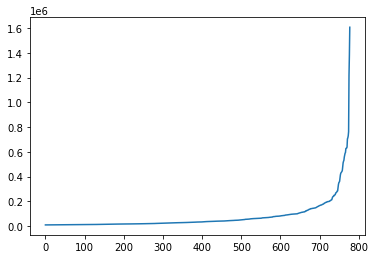

In [12]:
plt.plot(views)
plt.show()

In [13]:
num_views_hist = 10
views_hist = np.histogram(views, bins = np.linspace(views.min(),views.max(), num_views_hist))
views_hist = views_hist[0].astype(np.int64)
views_hist

array([714,  38,  11,  10,   2,   0,   1,   1,   1], dtype=int64)

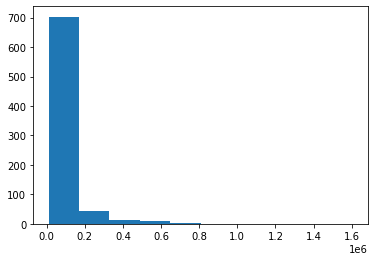

In [14]:
plt.hist(views, bins = num_views_hist)#np.linspace(0,len(views), 7)
plt.show()

# Сознание датасета

In [15]:
n = news[:100]
n

[{'date': '31 декабря 2020',
  'time': '23:55',
  'views': 12707,
  'headline': 'Алиев ответил на обвинения ЮНЕСКО из-за армянских памятников в Карабахе ',
  'link': 'https://ria.ru/20201231/pamyatniki-1591740604.html',
  'tags': ['Ситуация в Нагорном Карабахе',
   'Никол Пашинян',
   'ЮНЕСКО',
   'Ильхам Алиев',
   'Москва',
   'Азербайджан',
   'Армения',
   'В мире'],
  'text': 'БАКУ, 31 дек – РИА Новости. Президент Азербайджана Ильхам Алиев заявил в новогоднем обращении, что ЮНЕСКО ложно обвиняет Баку в связи ситуацией с армянскими памятниками в Нагорном Карабахе. Гендиректор ЮНЕСКО по вопросам культуры Эрнесто Оттоне заявил 21 декабря, что организация ожидает ответа от Азербайджана по поводу возможности отправления экспертной миссии организации в Карабах. Он отметил, что к властям Азербайджана неоднократно обращались по этому вопросу, но безуспешно. "Мы довели до мировой общественности правду о войне, о разрушенных городах, селах, в то время как у нас не было возможности ездить в 

In [16]:
counter = 0
for i in news:
    if i['link'].find('sport.ria.ru')!=-1:
        counter+=1
counter

74

In [17]:
data = pd.DataFrame(news)
data.head()

,date,time,views,headline,link,tags,text
0,31 декабря 2020,23:55,12707,Алиев ответил на обвинения ЮНЕСКО из-за армянс...,https://ria.ru/20201231/pamyatniki-1591740604....,"[Ситуация в Нагорном Карабахе, Никол Пашинян, ...","БАКУ, 31 дек – РИА Новости. Президент Азербайд..."
1,31 декабря 2020,23:19,40254,ВОЗ внесла вакцину Pfizer в список для экстрен...,https://ria.ru/20201231/vaktsina-1591739960.html,"[Распространение нового коронавируса, Панамери...","МОСКВА, 31 дек - РИА Новости. Всемирная органи..."
2,31 декабря 2020,21:42,41742,В Сургуте Дед Мороз разбился в ДТП,https://ria.ru/20201231/dtp-1591738065.html,"[Россия, Снегурочка, Дед Мороз, Сургут, ДТП, П...","МОСКВА, 31 дек — РИА Новости. Мужчина в костюм..."
3,31 декабря 2020,21:16,29648,В Москве задержали или отменили около 105 рейсов,https://ria.ru/20201231/reys-1591737184.html,"[Домодедово (аэропорт), Шереметьево (аэропорт)...","МОСКВА, 31 дек — РИА Новости. В московских аэр..."
4,31 декабря 2020,20:07,355887,Депутат Рады надел шапку с красной звездой и о...,https://ria.ru/20201231/shapka-1591735431.html,"[Оппозиционная платформа - За жизнь, Ситуация ...","МОСКВА, 31 дек — РИА Новости. Депутат Рады от ..."


In [18]:
len(data)

778

In [19]:
data.to_csv("last_week.csv")

In [103]:
data = pd.read_csv("last_week.csv")
data.head()

,Unnamed: 0,date,time,views,headline,link,tags,text
0,0,31 декабря 2020,23:55,11423,Алиев ответил на обвинения ЮНЕСКО из-за армянс...,https://ria.ru/20201231/pamyatniki-1591740604....,"['Ситуация в Нагорном Карабахе', 'Никол Пашиня...","БАКУ, 31 дек – РИА Новости. Президент Азербайд..."
1,1,31 декабря 2020,23:19,40055,ВОЗ внесла вакцину Pfizer в список для экстрен...,https://ria.ru/20201231/vaktsina-1591739960.html,"['Распространение нового коронавируса', 'Панам...","МОСКВА, 31 дек - РИА Новости. Всемирная органи..."
2,2,31 декабря 2020,21:42,41404,В Сургуте Дед Мороз разбился в ДТП,https://ria.ru/20201231/dtp-1591738065.html,"['Россия', 'Снегурочка', 'Дед Мороз', 'Сургут'...","МОСКВА, 31 дек — РИА Новости. Мужчина в костюм..."
3,3,31 декабря 2020,21:16,29509,В Москве задержали или отменили около 105 рейсов,https://ria.ru/20201231/reys-1591737184.html,"['Домодедово (аэропорт)', 'Шереметьево (аэропо...","МОСКВА, 31 дек — РИА Новости. В московских аэр..."
4,4,31 декабря 2020,20:07,273915,Депутат Рады надел шапку с красной звездой и о...,https://ria.ru/20201231/shapka-1591735431.html,"['Оппозиционная платформа - За жизнь', 'Ситуац...","МОСКВА, 31 дек — РИА Новости. Депутат Рады от ..."


In [105]:
data

,Unnamed: 0,date,time,views,headline,link,tags,text
0,0,31 декабря 2020,23:55,11423,Алиев ответил на обвинения ЮНЕСКО из-за армянс...,https://ria.ru/20201231/pamyatniki-1591740604....,"['Ситуация в Нагорном Карабахе', 'Никол Пашиня...","БАКУ, 31 дек – РИА Новости. Президент Азербайд..."
1,1,31 декабря 2020,23:19,40055,ВОЗ внесла вакцину Pfizer в список для экстрен...,https://ria.ru/20201231/vaktsina-1591739960.html,"['Распространение нового коронавируса', 'Панам...","МОСКВА, 31 дек - РИА Новости. Всемирная органи..."
2,2,31 декабря 2020,21:42,41404,В Сургуте Дед Мороз разбился в ДТП,https://ria.ru/20201231/dtp-1591738065.html,"['Россия', 'Снегурочка', 'Дед Мороз', 'Сургут'...","МОСКВА, 31 дек — РИА Новости. Мужчина в костюм..."
3,3,31 декабря 2020,21:16,29509,В Москве задержали или отменили около 105 рейсов,https://ria.ru/20201231/reys-1591737184.html,"['Домодедово (аэропорт)', 'Шереметьево (аэропо...","МОСКВА, 31 дек — РИА Новости. В московских аэр..."
4,4,31 декабря 2020,20:07,273915,Депутат Рады надел шапку с красной звездой и о...,https://ria.ru/20201231/shapka-1591735431.html,"['Оппозиционная платформа - За жизнь', 'Ситуац...","МОСКВА, 31 дек — РИА Новости. Депутат Рады от ..."
...,...,...,...,...,...,...,...,...
762,762,25 декабря 2020,01:55,136003,"У ""танцующего миллионера"" родился ребенок с ""в...",https://ria.ru/20201225/rebenok-1590843132.html,"['Шоубиз', 'В мире', 'Джанлука Вакки', 'Италия']","МОСКВА, 25 дек — РИА Новости. Итальянский пред..."
763,763,25 декабря 2020,01:39,16107,В посольстве заявили о бездействии властей Кан...,https://ria.ru/20201225/natsist-1590842839.html,"['Гельмут Оберлендер', 'Симон Визенталь', 'Отт...","ТОРОНТО, 25 дек — РИА Новости. Власти Канады о..."
764,764,25 декабря 2020,01:02,67697,В Крыму ответили на планы Киева сорвать проект...,https://ria.ru/20201225/krym-1590842026.html,"['Россия', 'Днепр (город)', 'Дмитрий Кулеба', ...","СИМФЕРОПОЛЬ, 25 дек — РИА Новости. Глава комит..."
765,765,25 декабря 2020,00:55,12740,Президент Грузии назначила Георгия Гахария пре...,https://ria.ru/20201225/premer-1590841863.html,"['Давид Залкалиани', 'Георгий Гахария', 'Салом...","ТБИЛИСИ, 25 дек - РИА Новости. Президент Грузи..."
